In [38]:
# Dependencies and Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
import plotly.express as px

In [39]:
#Data Files
Wages_by_Education_file = Path("wages_by_education.csv")

# Read CSV File
df = pd.read_csv (Wages_by_Education_file)
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [40]:
#Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

QUESTION 1 - •	Are things trending towards females earning as much as males for those with an advanced degree?

In [67]:
# Filter the data for females with an advanced degree 
women_with_advanced_degree = df[['year','women_advanced_degree']]


In [68]:
# Filter the data for females with an advanced degree 
men_with_advanced_degree = df[['year','men_advanced_degree']]


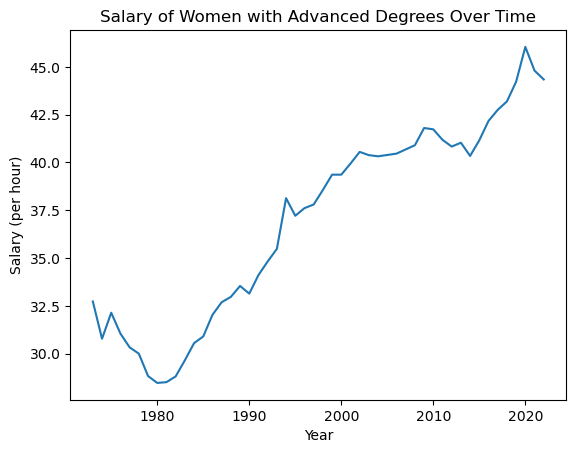

In [43]:
# Generate a line plot of the salaries of women with advanced degrees over time.

plt.plot(women_with_advanced_degree['year'],women_with_advanced_degree['women_advanced_degree'])
plt.xlabel('Year')
plt.ylabel('Salary (per hour)')
plt.title('Salary of Women with Advanced Degrees Over Time')
plt.show()


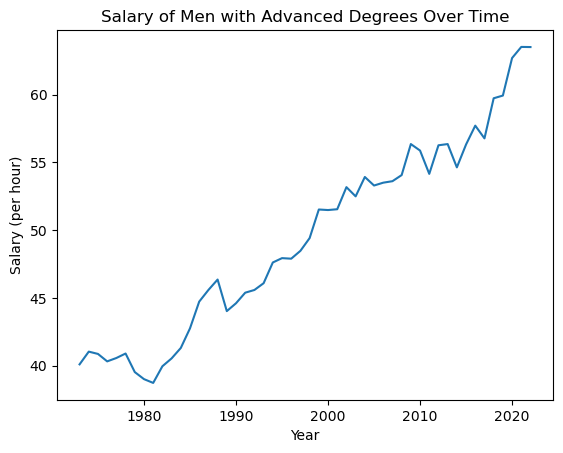

In [44]:
# Generate a line plot of the salaries of men with advanced degrees over time.

plt.plot(men_with_advanced_degree['year'],men_with_advanced_degree['men_advanced_degree'])
plt.xlabel('Year')
plt.ylabel('Salary (per hour)')
plt.title('Salary of Men with Advanced Degrees Over Time')
plt.show()

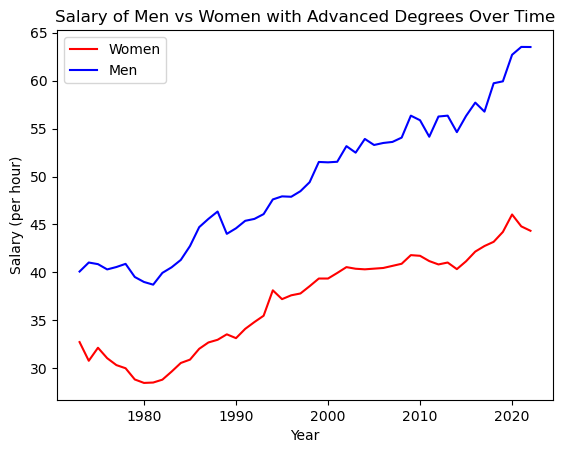

In [45]:
# Generate a line plot of the salaries of both men and women with advanced degrees over time.

plt.plot(women_with_advanced_degree['year'],women_with_advanced_degree['women_advanced_degree'], label = 'Women', color = 'red')
plt.plot(men_with_advanced_degree['year'],men_with_advanced_degree['men_advanced_degree'], label = 'Men', color = 'blue')
plt.xlabel('Year')
plt.ylabel('Salary (per hour)')
plt.title('Salary of Men vs Women with Advanced Degrees Over Time')
#plt.xlim(1970)
#plt.grid
#plt.figure(figsize = (30,30))
plt.legend()
plt.show()

#fig.savefig('men_vs_women_plot')

In [46]:
stats.ttest_ind(men_with_advanced_degree, women_with_advanced_degree)

TtestResult(statistic=array([0.        , 9.94780494]), pvalue=array([1.00000000e+00, 1.57093881e-16]), df=array([98., 98.]))

In [48]:
df_gender = df.iloc[:, [0, 10, 15]]
df_gender.head()

,year,men_advanced_degree,women_advanced_degree
0,2022,63.51,44.34
1,2021,63.52,44.80
2,2020,62.70,46.04
3,2019,59.93,44.22
4,2018,59.73,43.19


In [49]:
df_gender.columns

Index(['year', 'men_advanced_degree', 'women_advanced_degree'], dtype='object')

In [51]:
fig = px.line(df_gender, x = "year", y = df_gender.columns,title = "Hourly Wage vs Education (1973-2022)")
fig.update_layout(xaxis_title = "Years", yaxis_title = "Hourly Wage", legend_title = "Gender")
fig.show()

In [55]:
#Unpivot the dataset only looking at advanced degrees by gender
df_unpivoted = df_gender.melt(id_vars='year', var_name = 'gender', value_name = 'salary')
df_unpivoted.head()

,year,gender,salary
0,2022,men_advanced_degree,63.51
1,2021,men_advanced_degree,63.52
2,2020,men_advanced_degree,62.70
3,2019,men_advanced_degree,59.93
4,2018,men_advanced_degree,59.73
...,...,...,...
95,1977,women_advanced_degree,30.33
96,1976,women_advanced_degree,31.05
97,1975,women_advanced_degree,32.14
98,1974,women_advanced_degree,30.78


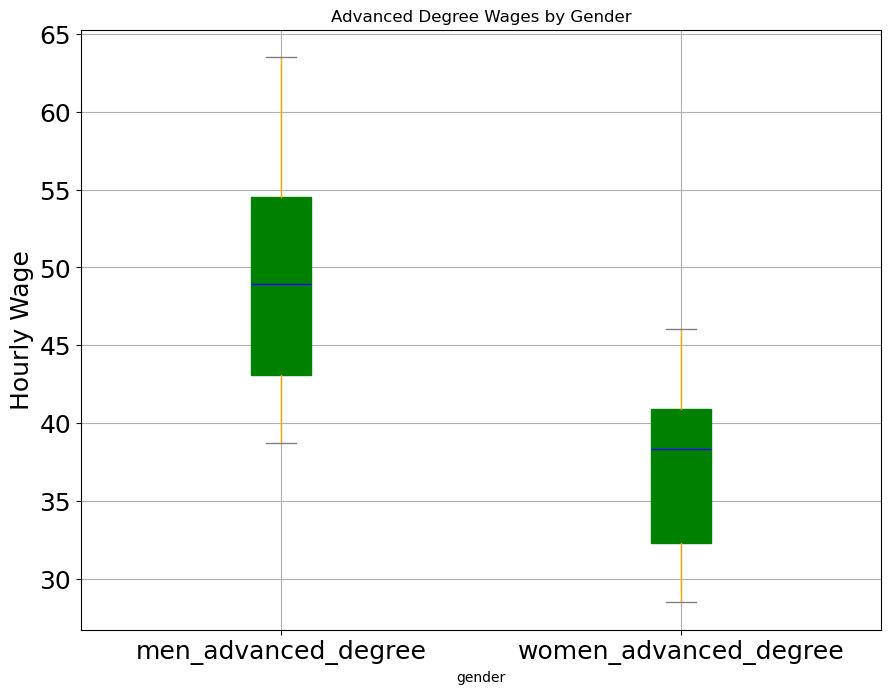

In [60]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivoted.boxplot("salary", by="gender", figsize=(10, 8),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Advanced Degree Wages by Gender',fontsize=12)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()

In [64]:
# Extract individual groups
group0 = df_unpivoted[df_unpivoted["gender"] == 'men_advanced_degree']["salary"]
group1 = df_unpivoted[df_unpivoted["gender"] == 'women_advanced_degree']["salary"]

In [65]:
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=98.95882314672339, pvalue=1.5709388132185287e-16)

In [66]:
#Run ttest against men_advanced_degree vs women_advanced_degree
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=9.947804941127643, pvalue=4.1822362231788787e-16, df=88.83363786823676)

QUESITON 2 - •	Does the increase in education affect the increase in salary for both men and women equally?

QUESTION 3 - •	For those with an advanced degree, is there a difference between one of the groups based on race for the last 5 years?

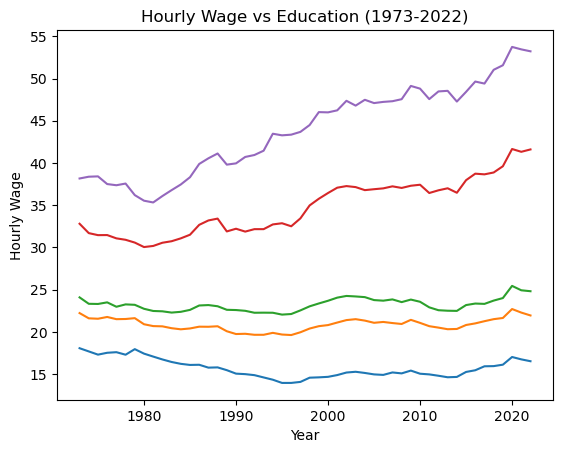

In [24]:

# Line Plot information
fig, ax = plt.subplots()
ax.plot(df['year'],df['less_than_hs'])
ax.plot(df['year'],df['high_school'])
ax.plot(df['year'],df['some_college'])
ax.plot(df['year'],df['bachelors_degree'])
ax.plot(df['year'],df['advanced_degree'])

# Graph Labels
ax.set_xlabel('Year')
ax.set_ylabel('Hourly Wage')
ax.set_title("Hourly Wage vs Education (1973-2022)")
plt.show()

In [28]:
#Only look at last 5 years
last_five = df[df['year']>=2018]

# Bring in only columns with word advanced
adv_degree_last = last_five.filter(like="advanced")

# Drop the first column that includes everyone with an advanced degree
adv_degree_last = adv_degree_last.drop(columns='advanced_degree')
adv_degree_last

,men_advanced_degree,women_advanced_degree,white_advanced_degree,black_advanced_degree,hispanic_advanced_degree,white_men_advanced_degree,black_men_advanced_degree,hispanic_men_advanced_degree,white_women_advanced_degree,black_women_advanced_degree,hispanic_women_advanced_degree
0,63.51,44.34,53.30,44.67,48.30,63.86,52.91,57.08,44.45,39.41,40.64
1,63.52,44.80,53.62,43.37,48.60,64.04,49.01,55.60,44.82,40.07,42.47
2,62.70,46.04,53.80,45.76,48.58,63.50,51.67,53.58,45.58,42.44,44.15
3,59.93,44.22,51.81,42.73,46.69,60.84,46.87,52.24,43.83,40.42,42.30
4,59.73,43.19,51.80,42.22,44.83,61.27,46.42,51.27,43.31,39.64,39.35
